# Assignment 1

All required code is a single line. The length of your response for questions that require identification and/or interpretation will not be considered in evaluation. For example, if a question can be answered with 'yes/no', or a numeric value, you may simply state as much. 

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that no outside searches are required by the assignment!). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

### Question 1: Simple Linear Regression 

Let's set up our workspace and use the `Boston` dataset in the `ISLP` library. Print `Boston` to learn more about the dataset.

In [35]:
# Import standard libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import subplots
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Import specific objects
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

In [36]:
# Load the "Boston" dataset using the "load_data" function from the ISLP package
Boston = load_data('Boston')
Boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


Before we fit and review model outputs, we should visualize our data. Review the code and plot, shown below. Answer the following questions:

_(i)_ What are the `medv` and `dis` variables being plotted? (Hint: review this [link](https://islp.readthedocs.io/en/latest/datasets/Boston.html))

'medv' is median value of owner-occupied homes in $1000s. Eg: 24.0, 36.2, 11.9

'dis' is the weighted mean of distances to five Boston employment centres. Eg: 4.0900, 2.5050 6.0622



_(ii)_ What concept ‘defines’ the plotted line?

The plotted line represents the 'Linear Regression" line. Linear regression is the statistical method used to model the relationship between dependent variable 'medv' (median home value represented on the y-axis) and independent variable 'dis'(weighted distances to five Boston employment centers represented on the x-axis).

The line helps to predict how house prices might change based on distance from employment centre.

The line represents the 'predicted' values of medv for each value of 'dis' based on the linear relationship that is identified by the 'model'. The 'model' is built by fitting the given 'medv' data for each 'dis' values. It uses the 'LinearRegression' and 'fit' method from scikit-learn (sklearn module) to do so.


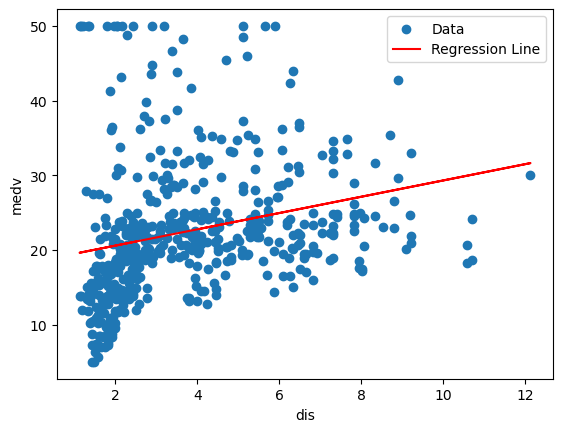

In [37]:
# Extract the variables
medv = Boston['medv'].values.reshape(-1, 1)
dis = Boston['dis'].values.reshape(-1, 1)

# Plot data
plt.scatter(dis, medv, label='Data')
plt.xlabel('dis')
plt.ylabel('medv')

# Fit a linear regression model
lm = LinearRegression()
lm.fit(dis, medv)

# Plot the regression line
plt.plot(dis, lm.predict(dis), color='red', label='Regression Line')

# Add labels and legend
plt.xlabel('dis')
plt.ylabel('medv')
plt.legend()

# Show the plot
plt.show()

Consider the variables plotted above. In the context of the `Boston` dataset:

_(iii)_ What is the (implied) null hypothesis? What is the (implied) alternative hypothesis?

Null hypothesis states that there is no relationship between predictor variable 'dis' and the response variable 'medv'. In other words, coefficient of 'dis' is 0. If the null hypothesis is true, it implies that changes in the 'dis' will not affect the 'medv'. In other words, the slope of the regression line would be zero.

But, as you can see by the plotted line, the slope is not zero. So, we reject the null hypothesis.

The alternative hypothesis states that there is relationship between 'dis' and 'medv'. It means that coefficient of 'dis' is not equal to 0.  If the alternative hypothesis is true, it implies that changes in 'dis' affect the 'medv'. The slope of the regression line would be non-zero. 

The alternative hypothesis is true in this case because the slope is positive.



_(iv)_ Now, let’s fit a simple regression model, using the general syntax `sm.OLS()` and `model.fit()`. As above, use `medv` as the response variable Y, and `dis` as the predictor variable X. (Hint: use the syntax `sm.add_constant` with the appropriate argument).

In [38]:
# Create the model matrix
X = pd.DataFrame({'dis': Boston['dis']})
X = sm.add_constant(X)
# print(X)

# Extract the response and fit the model
y = Boston['medv']
model = sm.OLS(y, X)  # to specify the model
results = model.fit() # to fit the model

In [39]:
summarize(results)

c:\Users\hml\.conda\envs\dsi_participant\lib\site-packages\ISLP\models\__init__.py:49: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  results_table = pd.read_html(tab.as_html(),


,coef,std err,t,P>|t|
const,18.3901,0.817,22.499,0.0
dis,1.0916,0.188,5.795,0.0


In [40]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 31 May 2024   Prob (F-statistic):           1.21e-08
Time:                        22:05:33   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
dis            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
print("Confidence Intervals for Coefficients:")
print(results.conf_int())

Confidence Intervals for Coefficients:
               0          1
const  16.784179  19.995997
dis     0.721509   1.461717


Review your model output to answer the following questions (Hint: use the `summary` and `conf_int` functions):   

_(v)_ What are the _coefficient estimates_ for $B_0$ (intercept) and $B_1$ (slope)?  

The _coefficient estimates_ for $B_0$ (intercept) (i.e., 'const') is 18.3901

The _coefficient estimates_ for $B_1$ (slope) (i.e., 'dis') is 1.0916




_(vi)_ What are the _standard errors_ for $B_0$ and $B_1$?  

The _standard error_ for $B_0$ is 0.817

The _standard error_ for $B_1$ is 0.188


_(vii)_ What are the _confidence intervals_ for $B_0$ and $B_1$?  

The _confidence intervals_ for $B_0$ (intercept) (i.e., 'const') are 16.784179 and 19.995997

The _confidence intervals_ for $B_1$ (slope) (i.e., 'dis') are 0.721509 and  1.461717




Now, let's interpret the model output.  
_(viii)_ Is the model a good fit? (Hint: review $R^2$)  

The R-squared value is 0.062, which implies that only 6.2% of variance in 'medv' value is explained by 'dis' predictor. A higher value of R-square would have meant a better fit. But, p-vaalue for coefficient of 'dis' is very low (<0.05). It suggests that the relationship between 'medv' and 'dis' is unlikely to be due to a random chance. I think the model is statistically significant, but 'div' cannot solely predict 'medv'.

_(ix)_ Do we reject the (implied) null hypothesis? Why or why not? (Hint: review model $F$ statistic, $p$ value).  

Based on the summary, we should reject the implied null hypothesis. The F-statistic is 33.58, and the p-value (Prob (F-statistic)) is very low (1.21e-08), indicating that the model is statistically significant. Since the p-value is less than the conventional threshold of 0.05, we can reject the null hypothesis, which means that 'dis' and 'medv' are associated.

### Question 2: Multiple Linear Regression 

We'll continue to use the `Boston` dataset for this question.

_(i)_ Fit a multiple linear regression, with two predictor variables: $X_1$ is `dis`, and $X_2$ is `rm`. As before, keep `medv` as the response variable Y. (Hint: use the syntax `sm.add_constant` with the appropriate arguments).

In [57]:
y = Boston['medv']
X = MS(['dis', 'rm']).fit_transform(Boston)
X = sm.add_constant(X)

# print(X)

model = sm.OLS(y, X)
results = model.fit()
summarize(results)



c:\Users\hml\.conda\envs\dsi_participant\lib\site-packages\ISLP\models\columns.py:159: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if is_categorical[i]:
c:\Users\hml\.conda\envs\dsi_participant\lib\site-packages\ISLP\models\__init__.py:49: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  results_table = pd.read_html(tab.as_html(),


,coef,std err,t,P>|t|
intercept,-34.6361,2.621,-13.212,0.000
dis,0.4888,0.141,3.459,0.001
rm,8.8014,0.424,20.780,0.000


In [51]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     247.0
Date:                Fri, 31 May 2024   Prob (F-statistic):           1.84e-75
Time:                        22:31:00   Log-Likelihood:                -1667.1
No. Observations:                 506   AIC:                             3340.
Df Residuals:                     503   BIC:                             3353.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -34.6361      2.621    -13.212      0.000     -39.786     -29.486
dis            0.4888      0.141      3.459      0.001       0.211       0.767
rm             8.8014      0.424     20.780      0.000       7.969       9.634
==============================================================================
Omnibus:                      142.807   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              844.520
Skew:                           1.090   Prob(JB):                    4.12e-184
Kurtosis:                       8.942   Cond. No.                         68.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

_(ii)_ In the context of the `Boston` dataset, state the null and alternative hypotheses.

Based on the summary, we should reject the implied null hypothesis. The F-statistic is 247.0, and the p-value (Prob (F-statistic)) is very low (1.84e-75), indicating that the model is statistically significant. Since the p-values for both the 'dis' coefficient and 'rm coefficient is less than the conventional threshold of 0.05, we can reject the null hypothesis, which means that 'medv' are associated with 'dis' and 'rm'.

The alternative hypothesis is true since the coefficients of 'dis' (0.4888) and 'rm' (8.8014) are positive.


_(iii)_ Review the model output, using `summary()`. Does it appear that both `dis` and `rm` are predictive of `medv`? How did you determine this?


The R-square value is 0.496, which implies that 49.6% of variance in 'medv' value is explained by using 'dis' and 'rm' predictors. This is much higher than the R-square with only 'dis' predictor (0.062). 

The p-value for coefficient of 'dis' is very low (0.001). The p-value for coefficient of 'rm' is also low (0.000) It suggests that the relationship of  'medv' with 'dis', and 'medv' with 'rm', is unlikely to be due to a random chance. 

Value of F-statistic (247.0) is high and the probability of F-statistic (1.84e-75) is very low. 

Therefore, both 'dis' and 'rm' are good predictors of 'medv'


_(iv)_ We can use the inbuilt `sm.graphics.plot_regress_exog` function to generate helpful diagnostic plots (Hint: provide `plot_regress_exog` with the multiple regression model). Review the first generated plot, 'Residuals vs. Fitted'. Which observations are outliers? What impact might outliers have on our model?


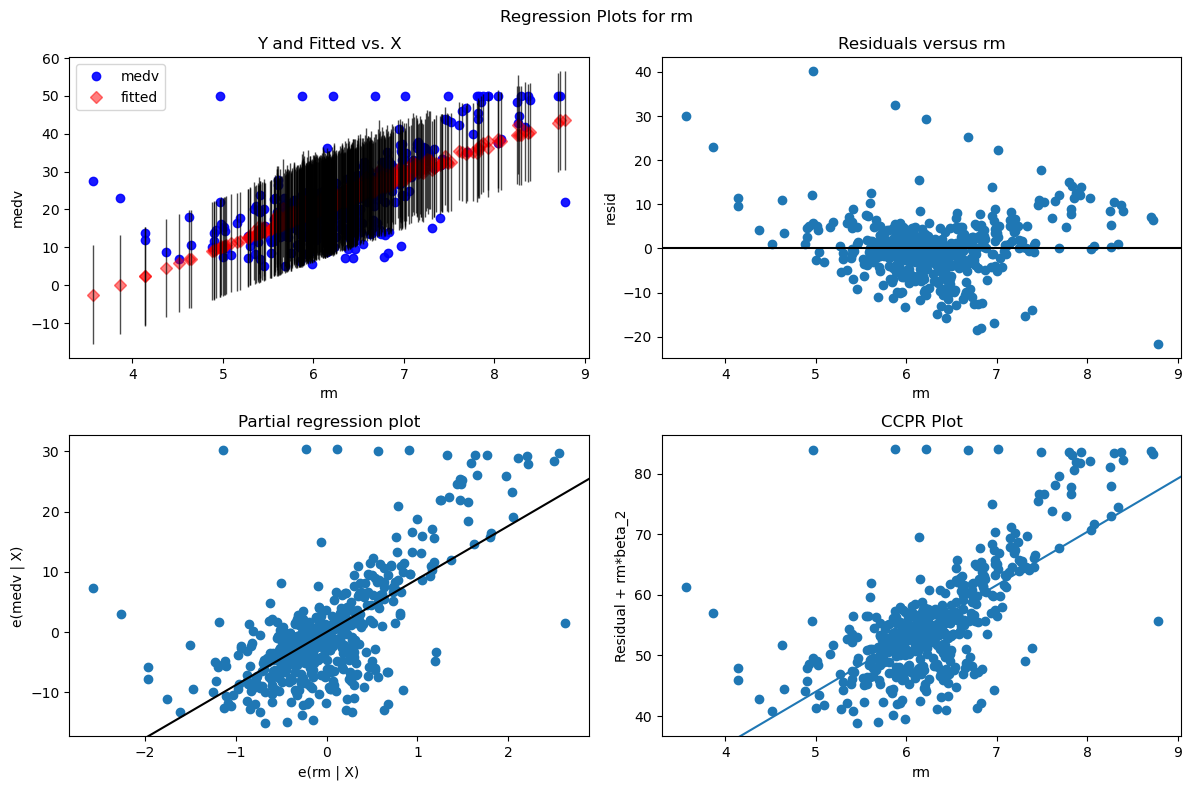

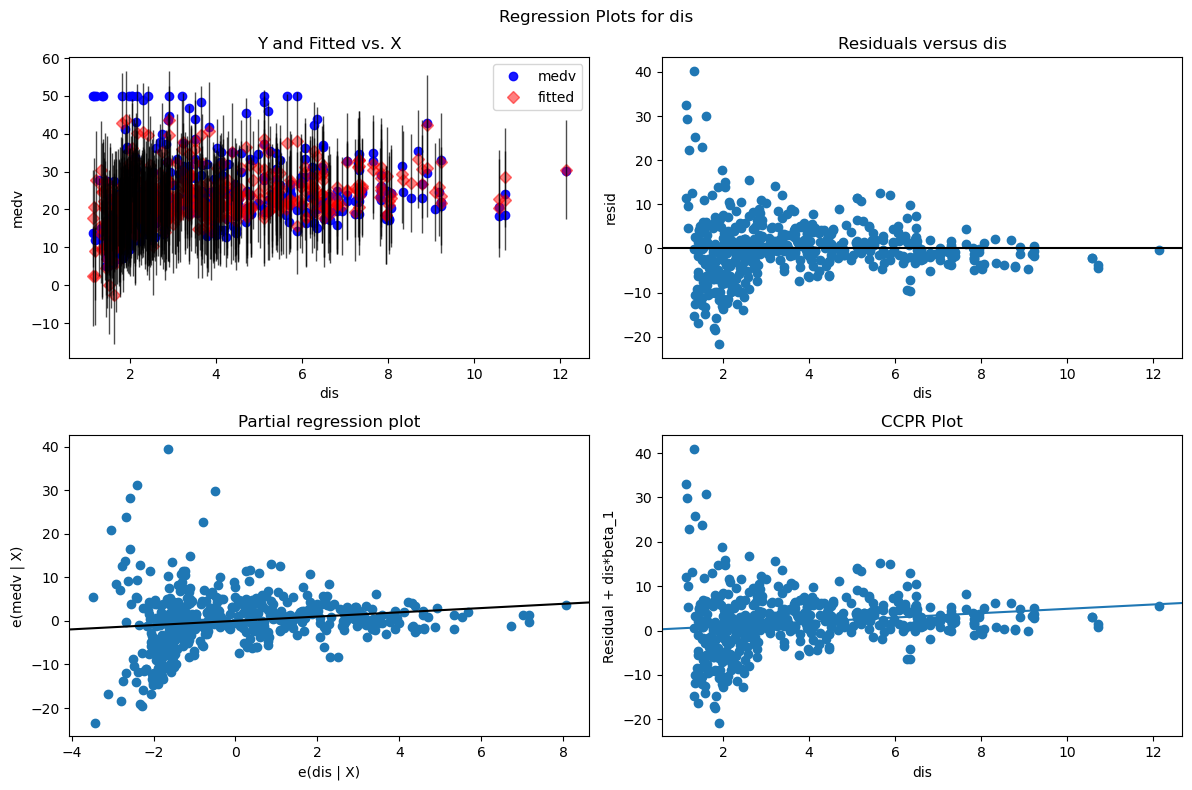

In [69]:
model = sm.OLS.from_formula('medv ~ dis + rm', data=Boston)
result = model.fit()

for var in ['rm', 'dis']:
    fig = sm.graphics.plot_regress_exog(result, var, fig=plt.figure(figsize=(12, 8)))
    fig.tight_layout(pad=1.0)
    plt.show()


In the 'Residual vs Fitted' plot, the observation points that lie far from the majority of the data points are outliers. These observation points are not scattered around the zero line. Thesr data points can skew the model. It can affect the estimated regression coefficients

_(v)_ Fit a second model, this time including an interaction between the two predictor variables. Is there an interaction? (Hint: add a variable `x1 * x2` where `x1` and `x2` are the predictor variables). State an interpretation of the interaction, in the context of the `Boston` dataset, in one or two sentences.

In [81]:

model = sm.OLS.from_formula('medv ~ dis * rm', data=Boston)
result = model.fit()

# Print the summary of the regression
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     178.7
Date:                Fri, 31 May 2024   Prob (F-statistic):           8.37e-79
Time:                        23:46:10   Log-Likelihood:                -1656.5
No. Observations:                 506   AIC:                             3321.
Df Residuals:                     502   BIC:                             3338.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -15.2533      4.895     -3.116      0.0

# Criteria

|Criteria            |Complete           |Incomplete          |
|--------------------|---------------|--------------|
|Simple Linear Regression - Standard errors for $B_0$ and $B_1$|The standard errors are correct.|The standard errors are not correct.|
|Simple Linear Regression - Confidence intervals for $B_0$ and $B_1$|The confidence intervals are correct.|The confidence intervals are not correct.|
|Multiple Linear Regression - Null and alternative hypotheses|The relationship for both hypotheses has been correctly identified.|The relationship for both hypotheses has been incorrectly identified.|
|Multiple Linear Regression - Interpretation of the interaction|The interaction has been correctly identified.|The interaction has been incorrectly identified.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applied_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
